# <span style="font-size:32px">Daily Assignment: MNIST Digit Classification using TensorFlow</span>

**Task**: Build a feedforward neural network using **TensorFlow** to classify the **MNIST handwritten digits** dataset.  
Experiment with different **numbers of layers**, **neurons**, and **activation functions** to observe their impact on model performance.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28 * 28).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28 * 28).astype("float32") / 255.0


model = models.Sequential([
        layers.GaussianNoise(0.01, input_shape=(28*28,)),  
        
        layers.Dense(3072, activation='swish', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(2048, activation='swish', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(1024, activation='swish', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(512, activation='swish', kernel_initializer='he_normal'),
        layers.BatchNormalization(),

        layers.Dense(256, activation='swish', kernel_initializer='he_normal'),
        layers.BatchNormalization(),

        layers.Dense(10, activation='softmax')  # Output layer
    ])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1)


2025-06-05 18:59:07.368776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-05 18:59:07.518384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749149947.575966    1701 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749149947.591778    1701 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749149947.705406    1701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

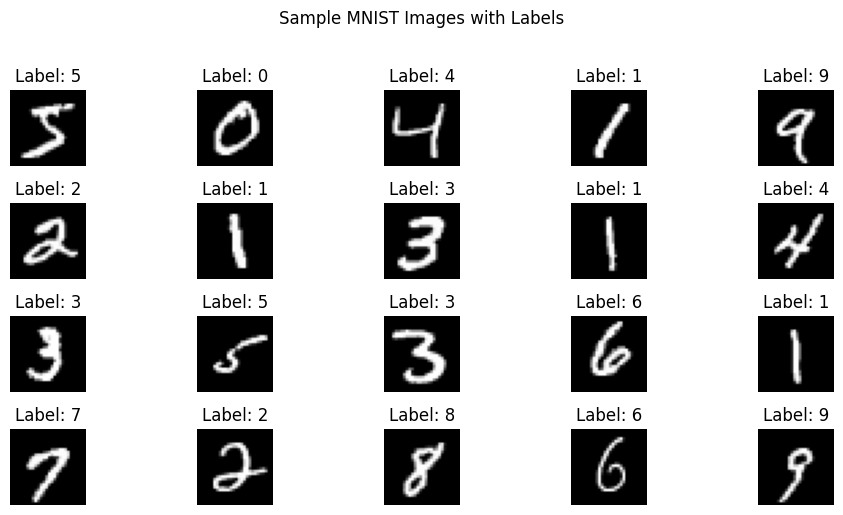

In [2]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels',y=1.02)
plt.tight_layout()
plt.show()

In [3]:
history = model.fit(
    train_images, train_labels,
    epochs=300,
    batch_size=256,
    validation_data=(test_images, test_labels),
    callbacks=[lr_schedule, early_stopping],
    verbose=2)

Epoch 1/300


I0000 00:00:1749149956.753259    1882 service.cc:152] XLA service 0x7fd308017710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749149956.753296    1882 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-05 18:59:16.940865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749149957.217949    1882 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749149961.334905    1882 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-06-05 18:59:24.364929: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3125', 24 bytes spill stores, 24 bytes spill loads



235/235 - 14s - 61ms/step - accuracy: 0.9306 - loss: 0.2293 - val_accuracy: 0.9390 - val_loss: 0.1902 - learning_rate: 1.0000e-03
Epoch 2/300
235/235 - 2s - 9ms/step - accuracy: 0.9688 - loss: 0.1010 - val_accuracy: 0.9696 - val_loss: 0.0959 - learning_rate: 1.0000e-03
Epoch 3/300
235/235 - 2s - 7ms/step - accuracy: 0.9745 - loss: 0.0791 - val_accuracy: 0.9776 - val_loss: 0.0765 - learning_rate: 1.0000e-03
Epoch 4/300
235/235 - 2s - 7ms/step - accuracy: 0.9797 - loss: 0.0617 - val_accuracy: 0.9803 - val_loss: 0.0709 - learning_rate: 1.0000e-03
Epoch 5/300
235/235 - 2s - 7ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 0.9786 - val_loss: 0.0749 - learning_rate: 1.0000e-03
Epoch 6/300
235/235 - 2s - 8ms/step - accuracy: 0.9844 - loss: 0.0467 - val_accuracy: 0.9798 - val_loss: 0.0701 - learning_rate: 1.0000e-03
Epoch 7/300
235/235 - 2s - 8ms/step - accuracy: 0.9867 - loss: 0.0404 - val_accuracy: 0.9788 - val_loss: 0.0744 - learning_rate: 1.0000e-03
Epoch 8/300
235/235 - 2s - 7ms

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.9883 - loss: 0.0485

Test Accuracy: 0.9883000254631042


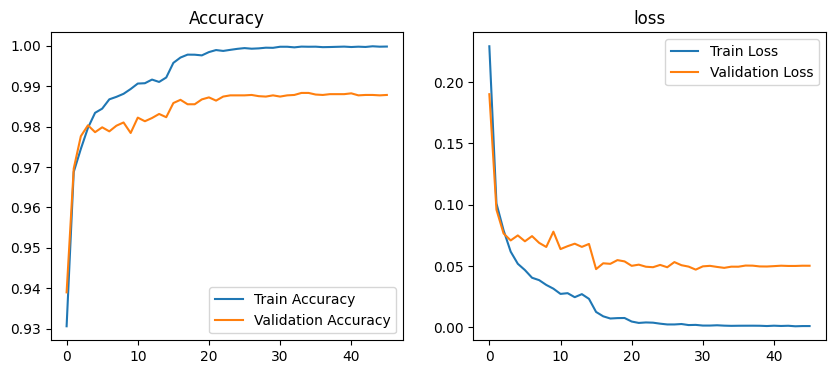

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


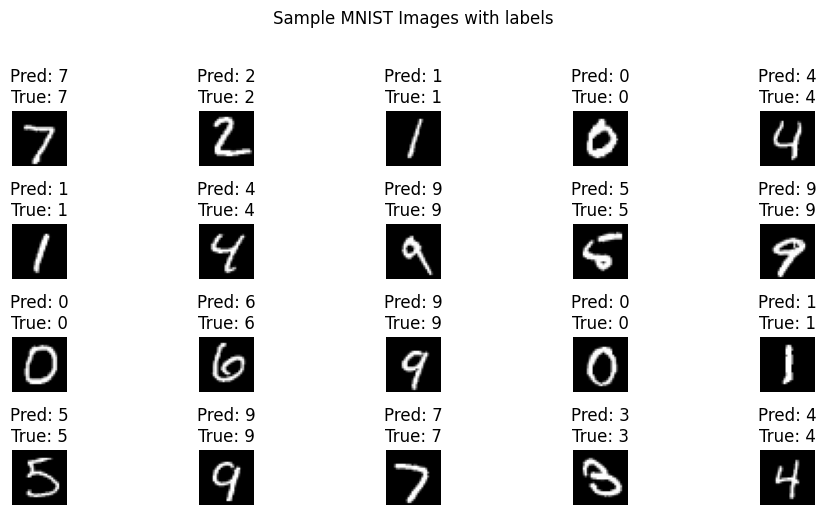

In [6]:
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1) 

plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample MNIST Images with labels', y = 1.02)
plt.tight_layout()
plt.show()